In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml

In [7]:
# Load the Fashion MNIST dataset
data, labels = fetch_openml('Fashion-MNIST', version=1, return_X_y=True)

# Define the number of dimensions for PCA
n_components = 2

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# **PART 1: Apply PCA**





In [4]:
# Apply PCA with 2 components
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data)

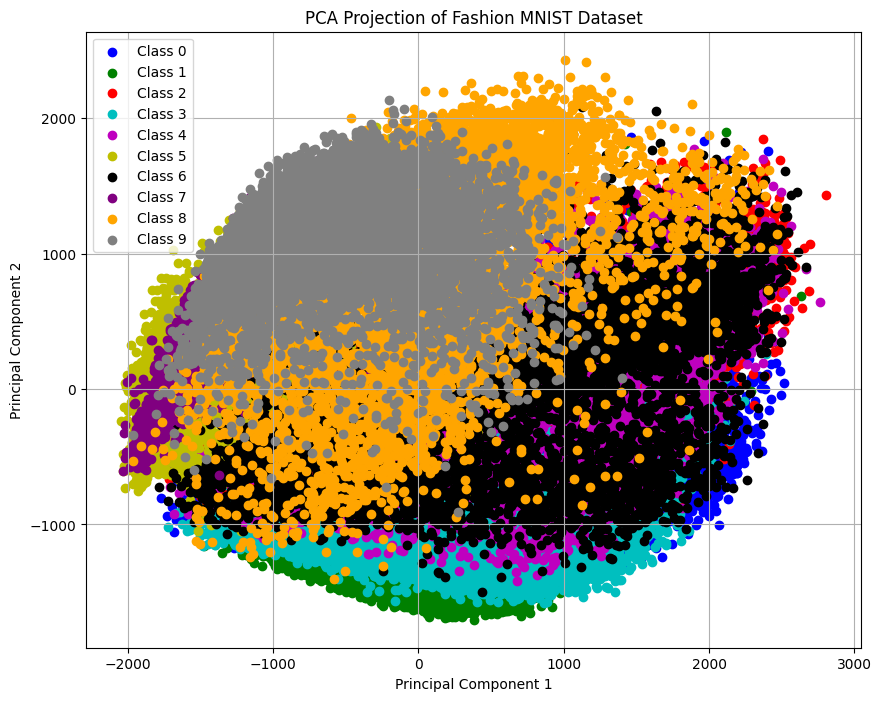

In [5]:
# Create a scatter plot for reduced dimensions
plt.figure(figsize=(10, 8))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange', 'gray']

for i in range(10):
    plt.scatter(data_pca[labels == str(i)][:, 0], data_pca[labels == str(i)][:, 1], label=f'Class {i}', color=colors[i])

plt.title('PCA Projection of Fashion MNIST Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# Show the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f'Explained Variance Ratio for the first {n_components} components: {explained_variance_ratio}')

Explained Variance Ratio for the first 2 components: [0.2905654  0.17738509]


# **PART 2: Apply LDA**

In [9]:
# Apply LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Assuming n_components and data are defined earlier in your code
lda = LDA(n_components=n_components)
data_lda = lda.fit_transform(data, labels)

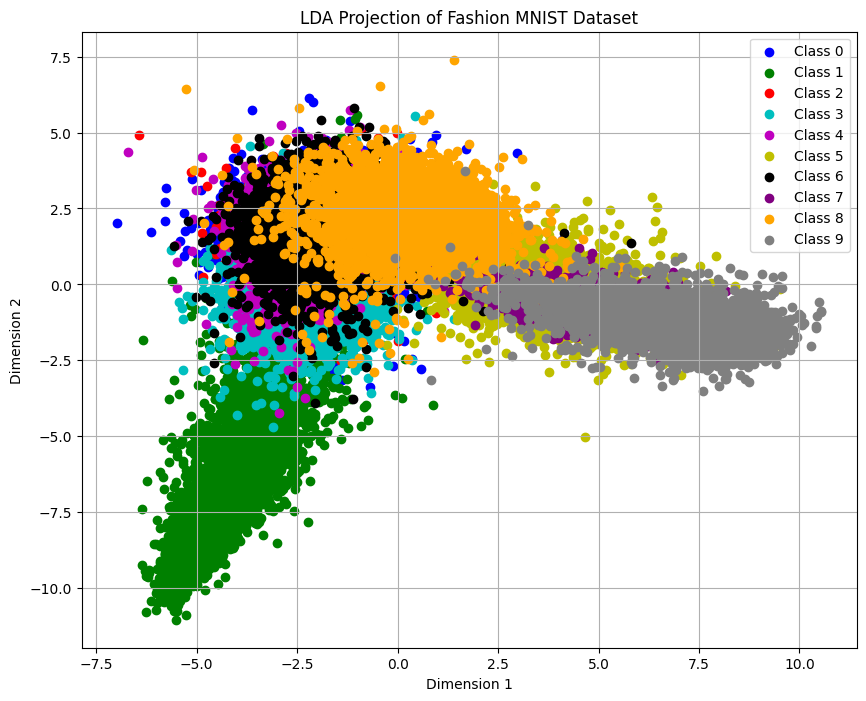

In [10]:
# Create a scatter plot for reduced dimensions
plt.figure(figsize=(10, 8))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange', 'gray']

for i in range(10):
    plt.scatter(data_lda[labels == str(i)][:, 0], data_lda[labels == str(i)][:, 1], label=f'Class {i}', color=colors[i])

plt.title('LDA Projection of Fashion MNIST Dataset')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# Eigenvalues (the 'explained variance' in LDA context)
eigenvalues = lda.explained_variance_ratio_

# Calculate the ratio (similar to explained variance ratio in PCA)
explained_variance_ratio_lda = eigenvalues / eigenvalues.sum()

# Print the 'explained variance ratio' for LDA components
print("Explained variance ratio by LDA components:", explained_variance_ratio_lda)

Explained variance ratio by LDA components: [0.67179437 0.32820563]


# **PART 3**

# Q1. Compare the variance ratio explained by the 2-dimensions of the methods you have used. Which is better?

### PCA Explained Variance Ratio:
- The first PCA component captures about 29.06% of the important information.
- The second component adds another 17.74% to this.
- Together, the two PCA components hold about 46.8% of the important information from the entire dataset.

### LDA Explained Variance Ratio:
- The first LDA component accounts for about 67.18% of the important information that separates the different classes (like types of clothing).
- The second component brings in another 32.82%.
- This means that together, the two LDA components capture 100% of the important information for telling the classes apart.

### Which is Better?
- **For PCA**, less than half of the total important information is captured with two components. There's a lot that these components don't tell us about the whole dataset.
- **For LDA**, all the information that is important for distinguishing between different classes is captured with two components. It's like having a complete picture of what separates one type of clothing from another.

In simple terms, if we want to reduce the data and still keep as much information as possible to tell different classes apart, **LDA is better**. This is because its two components are enough to fully differentiate between the classes, according to the variance ratio explained. On the other hand, PCA only gives you very less information (variance) with its two components.

# Q2. Compare the scatter plot of the two methods after reduction. Which is a better method for separating the different classes of data?

### PCA Projection:

- From the scatter plot of PCA, one can see that the first principal component (horizontal axis) covers the maximum variance in dataset which has been indicated by the broad spread out of data points.
- The second principal component (on the vertical axis) has lesser variance compared to the first but still represents some kind of a split  of the data points.
- There is a little overlap between the various classes across the two principal components. Although there exists some clustering, the separation of the classes has not been achieved, and thus it is not really possible to separate them on these two components alone.

### LDA Projection:

- LDA scatter plot shows better clustering of points so that the classes are more distinctly separated than the PCA scatter. This further underscores LDA bringing clear separation between the various classes because LDA seeks to identify axes that enable best differentiation.
- Though there may occasionally be some intermingling, the classes tend to form separate groupings in the LDA plot along the axes that also correspond to the most discriminative features for separating the classes.
- The axes of the LDA plot (dimension 1 as well as dimension 2) do not correspond to the underlying variance, as in principal components PCA but show best discriminating directions between classes.

### Comparison and Which One is Better for Class Separation:

- **Class Separation**: Generally, LDA provides a much better class separation as compared to PCA due to the fact that it has an objective of explicitly modeling the differences that exist between the classes. In fact, with reference to the plot presented using LDA, the classes tend to be much distinct and compact in nature, thus indicating perfect class discrimination.
- **Overlap**: Considering that both plots show some sort of overlapping between the various classes, it can be seen that the PCA plot shows an even more general and diffused type of overlap pattern as compared to that of the LDA plot which appears to show a more localized and more concentrated like overlap. Therefore indicating that on the whole, classes are better separable.
- **Use Case**: PCA is desired for unsupervised dimensionality reduction, in particular when the goal is to reduce the data into its principal components without regard to any class labels. As compared to this, LDA is the method of choice for dimensionality reduction when there are available class labels and the goal becomes the class separation.

In conclusion, the discriminant technique that should be used for separating different classes of data is **LDA**. As seen on the LDA plot, bounds between the different classes are more visible than on the PCA plot, thus it would be a better classifier.

# Q3. What is the primary difference between the two methods? Which method works better in this case and why?


In the case of the Fashion MNIST dataset, where we have pictures of different clothing items and we want to tell them apart (like distinguishing shirts from shoes), LDA works better. This is because LDA focuses on making sure that each type of clothing appears distinct from the others in the reduced data. PCA doesn't focus on the differences between types of clothing; it just reduces the data based on which aspects vary the most, which might not always help in telling one piece of clothing from another.